## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  97.067485  1422.160356  0.683010   8.686950  1.636309
1  76.303332   826.623964  0.910763  10.199269  1.652051
2  14.303068   202.824443  0.970099   9.809310  1.652355
3  84.036758   606.976687  0.315530   3.119253  1.187958
4  90.898596  1464.545365  0.414840   6.942170  1.374413


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 0.9503067	total: 53.7ms	remaining: 53.7s
1:	learn: 0.9400810	total: 55.6ms	remaining: 27.7s
2:	learn: 0.9301265	total: 61.2ms	remaining: 20.3s
3:	learn: 0.9195353	total: 62.5ms	remaining: 15.6s
4:	learn: 0.9100810	total: 63.4ms	remaining: 12.6s
5:	learn: 0.9018798	total: 64.5ms	remaining: 10.7s
6:	learn: 0.8925812	total: 65ms	remaining: 9.22s
7:	learn: 0.8833574	total: 65.6ms	remaining: 8.13s
8:	learn: 0.8742378	total: 66.2ms	remaining: 7.29s
9:	learn: 0.8668556	total: 67ms	remaining: 6.63s
10:	learn: 0.8571149	total: 67.7ms	remaining: 6.09s
11:	learn: 0.8483914	total: 68.3ms	remaining: 5.62s
12:	learn: 0.8408030	total: 68.8ms	remaining: 5.22s
13:	learn: 0.8330640	total: 69.5ms	remaining: 4.9s
14:	learn: 0.8260296	total: 70.2ms	remaining: 4.61s
15:	learn: 0.8193029	total: 71ms	remaining: 4.37s
16:	learn: 0.8114880	total: 71.6ms	remaining: 4.14s
17:	learn: 0.8031084	total: 72.4ms	remaining: 3.95s
18:	learn: 0.7967034	total: 73.2ms	remaining: 3.78s
19:	learn: 0.7890872	total: 7

133:	learn: 0.3337161	total: 168ms	remaining: 1.09s
134:	learn: 0.3322249	total: 170ms	remaining: 1.09s
135:	learn: 0.3298667	total: 171ms	remaining: 1.09s
136:	learn: 0.3277661	total: 172ms	remaining: 1.08s
137:	learn: 0.3263027	total: 173ms	remaining: 1.08s
138:	learn: 0.3241081	total: 174ms	remaining: 1.08s
139:	learn: 0.3219281	total: 175ms	remaining: 1.08s
140:	learn: 0.3202539	total: 176ms	remaining: 1.07s
141:	learn: 0.3183350	total: 177ms	remaining: 1.07s
142:	learn: 0.3165248	total: 178ms	remaining: 1.07s
143:	learn: 0.3147185	total: 180ms	remaining: 1.07s
144:	learn: 0.3128355	total: 188ms	remaining: 1.11s
145:	learn: 0.3111712	total: 189ms	remaining: 1.1s
146:	learn: 0.3096465	total: 192ms	remaining: 1.11s
147:	learn: 0.3078009	total: 193ms	remaining: 1.11s
148:	learn: 0.3064300	total: 194ms	remaining: 1.11s
149:	learn: 0.3042774	total: 195ms	remaining: 1.1s
150:	learn: 0.3029229	total: 196ms	remaining: 1.1s
151:	learn: 0.3006968	total: 197ms	remaining: 1.1s
152:	learn: 0.29

169:	learn: 0.2724510	total: 215ms	remaining: 1.05s
170:	learn: 0.2707880	total: 215ms	remaining: 1.04s
171:	learn: 0.2692226	total: 216ms	remaining: 1.04s
172:	learn: 0.2674181	total: 218ms	remaining: 1.04s
173:	learn: 0.2662385	total: 220ms	remaining: 1.04s
174:	learn: 0.2651184	total: 221ms	remaining: 1.04s
175:	learn: 0.2636288	total: 222ms	remaining: 1.04s
176:	learn: 0.2620974	total: 223ms	remaining: 1.03s
177:	learn: 0.2606719	total: 226ms	remaining: 1.04s
178:	learn: 0.2592865	total: 228ms	remaining: 1.05s
179:	learn: 0.2578406	total: 229ms	remaining: 1.04s
180:	learn: 0.2565323	total: 231ms	remaining: 1.04s
181:	learn: 0.2556837	total: 231ms	remaining: 1.04s
182:	learn: 0.2543669	total: 232ms	remaining: 1.04s
183:	learn: 0.2530523	total: 234ms	remaining: 1.04s
184:	learn: 0.2519698	total: 236ms	remaining: 1.04s
185:	learn: 0.2505639	total: 238ms	remaining: 1.04s
186:	learn: 0.2495792	total: 239ms	remaining: 1.04s
187:	learn: 0.2480996	total: 241ms	remaining: 1.04s
188:	learn: 

254:	learn: 0.1823538	total: 327ms	remaining: 957ms
255:	learn: 0.1819146	total: 328ms	remaining: 953ms
256:	learn: 0.1815940	total: 329ms	remaining: 952ms
257:	learn: 0.1809946	total: 330ms	remaining: 949ms
258:	learn: 0.1801781	total: 331ms	remaining: 946ms
259:	learn: 0.1795437	total: 331ms	remaining: 943ms
260:	learn: 0.1788607	total: 332ms	remaining: 940ms
261:	learn: 0.1779170	total: 332ms	remaining: 936ms
262:	learn: 0.1769101	total: 333ms	remaining: 933ms
263:	learn: 0.1761942	total: 334ms	remaining: 930ms
264:	learn: 0.1755713	total: 334ms	remaining: 927ms
265:	learn: 0.1752587	total: 335ms	remaining: 924ms
266:	learn: 0.1744194	total: 335ms	remaining: 921ms
267:	learn: 0.1736472	total: 336ms	remaining: 918ms
268:	learn: 0.1729665	total: 336ms	remaining: 914ms
269:	learn: 0.1722629	total: 337ms	remaining: 911ms
270:	learn: 0.1713151	total: 337ms	remaining: 908ms
271:	learn: 0.1706443	total: 338ms	remaining: 905ms
272:	learn: 0.1698184	total: 339ms	remaining: 902ms
273:	learn: 

314:	learn: 0.1441246	total: 374ms	remaining: 813ms
315:	learn: 0.1435562	total: 375ms	remaining: 812ms
316:	learn: 0.1427982	total: 376ms	remaining: 810ms
317:	learn: 0.1421034	total: 376ms	remaining: 807ms
318:	learn: 0.1416493	total: 377ms	remaining: 805ms
319:	learn: 0.1409610	total: 378ms	remaining: 802ms
320:	learn: 0.1402896	total: 378ms	remaining: 800ms
321:	learn: 0.1398473	total: 379ms	remaining: 798ms
322:	learn: 0.1392196	total: 379ms	remaining: 795ms
323:	learn: 0.1385625	total: 380ms	remaining: 792ms
324:	learn: 0.1378074	total: 380ms	remaining: 790ms
325:	learn: 0.1373075	total: 381ms	remaining: 787ms
326:	learn: 0.1365891	total: 381ms	remaining: 785ms
327:	learn: 0.1358550	total: 382ms	remaining: 783ms
328:	learn: 0.1351540	total: 383ms	remaining: 781ms
329:	learn: 0.1346731	total: 383ms	remaining: 778ms
330:	learn: 0.1339900	total: 384ms	remaining: 776ms
331:	learn: 0.1333993	total: 384ms	remaining: 773ms
332:	learn: 0.1327316	total: 385ms	remaining: 770ms
333:	learn: 

489:	learn: 0.0718503	total: 483ms	remaining: 503ms
490:	learn: 0.0717133	total: 484ms	remaining: 502ms
491:	learn: 0.0714076	total: 491ms	remaining: 507ms
492:	learn: 0.0712735	total: 493ms	remaining: 507ms
493:	learn: 0.0709179	total: 500ms	remaining: 512ms
494:	learn: 0.0707861	total: 501ms	remaining: 511ms
495:	learn: 0.0706567	total: 502ms	remaining: 510ms
496:	learn: 0.0702803	total: 503ms	remaining: 509ms
497:	learn: 0.0701540	total: 504ms	remaining: 508ms
498:	learn: 0.0699482	total: 504ms	remaining: 506ms
499:	learn: 0.0698240	total: 505ms	remaining: 505ms
500:	learn: 0.0695395	total: 505ms	remaining: 503ms
501:	learn: 0.0694170	total: 506ms	remaining: 502ms
502:	learn: 0.0692199	total: 506ms	remaining: 500ms
503:	learn: 0.0690994	total: 507ms	remaining: 499ms
504:	learn: 0.0687336	total: 508ms	remaining: 498ms
505:	learn: 0.0685436	total: 508ms	remaining: 496ms
506:	learn: 0.0683594	total: 509ms	remaining: 495ms
507:	learn: 0.0682415	total: 510ms	remaining: 494ms
508:	learn: 

524:	learn: 0.0650388	total: 530ms	remaining: 480ms
525:	learn: 0.0648067	total: 531ms	remaining: 479ms
526:	learn: 0.0647045	total: 532ms	remaining: 478ms
527:	learn: 0.0644596	total: 533ms	remaining: 476ms
528:	learn: 0.0643589	total: 534ms	remaining: 475ms
529:	learn: 0.0642665	total: 534ms	remaining: 473ms
530:	learn: 0.0640165	total: 535ms	remaining: 472ms
531:	learn: 0.0638608	total: 535ms	remaining: 471ms
532:	learn: 0.0635948	total: 536ms	remaining: 470ms
533:	learn: 0.0633574	total: 537ms	remaining: 468ms
534:	learn: 0.0630580	total: 537ms	remaining: 467ms
535:	learn: 0.0629086	total: 538ms	remaining: 466ms
536:	learn: 0.0628118	total: 539ms	remaining: 464ms
537:	learn: 0.0625890	total: 539ms	remaining: 463ms
538:	learn: 0.0624899	total: 540ms	remaining: 462ms
539:	learn: 0.0622321	total: 541ms	remaining: 461ms
540:	learn: 0.0621605	total: 541ms	remaining: 459ms
541:	learn: 0.0619277	total: 542ms	remaining: 458ms
542:	learn: 0.0617847	total: 542ms	remaining: 456ms
543:	learn: 

638:	learn: 0.0458000	total: 622ms	remaining: 351ms
639:	learn: 0.0455944	total: 622ms	remaining: 350ms
640:	learn: 0.0453715	total: 623ms	remaining: 349ms
641:	learn: 0.0451828	total: 625ms	remaining: 348ms
642:	learn: 0.0449836	total: 625ms	remaining: 347ms
643:	learn: 0.0447708	total: 626ms	remaining: 346ms
644:	learn: 0.0446828	total: 627ms	remaining: 345ms
645:	learn: 0.0444595	total: 627ms	remaining: 344ms
646:	learn: 0.0442672	total: 628ms	remaining: 343ms
647:	learn: 0.0440632	total: 629ms	remaining: 342ms
648:	learn: 0.0438760	total: 629ms	remaining: 340ms
649:	learn: 0.0436782	total: 630ms	remaining: 339ms
650:	learn: 0.0435121	total: 631ms	remaining: 338ms
651:	learn: 0.0433509	total: 631ms	remaining: 337ms
652:	learn: 0.0431595	total: 632ms	remaining: 336ms
653:	learn: 0.0429681	total: 632ms	remaining: 335ms
654:	learn: 0.0428130	total: 633ms	remaining: 333ms
655:	learn: 0.0427186	total: 634ms	remaining: 332ms
656:	learn: 0.0426261	total: 635ms	remaining: 331ms
657:	learn: 

714:	learn: 0.0352970	total: 670ms	remaining: 267ms
715:	learn: 0.0352169	total: 671ms	remaining: 266ms
716:	learn: 0.0350673	total: 672ms	remaining: 265ms
717:	learn: 0.0348843	total: 673ms	remaining: 264ms
718:	learn: 0.0347386	total: 674ms	remaining: 263ms
719:	learn: 0.0345961	total: 674ms	remaining: 262ms
720:	learn: 0.0344184	total: 675ms	remaining: 261ms
721:	learn: 0.0342890	total: 675ms	remaining: 260ms
722:	learn: 0.0342091	total: 676ms	remaining: 259ms
723:	learn: 0.0340714	total: 677ms	remaining: 258ms
724:	learn: 0.0339452	total: 677ms	remaining: 257ms
725:	learn: 0.0338185	total: 678ms	remaining: 256ms
726:	learn: 0.0336847	total: 679ms	remaining: 255ms
727:	learn: 0.0335131	total: 680ms	remaining: 254ms
728:	learn: 0.0333903	total: 681ms	remaining: 253ms
729:	learn: 0.0333316	total: 683ms	remaining: 253ms
730:	learn: 0.0332085	total: 684ms	remaining: 252ms
731:	learn: 0.0331340	total: 684ms	remaining: 250ms
732:	learn: 0.0330614	total: 685ms	remaining: 249ms
733:	learn: 

883:	learn: 0.0219593	total: 780ms	remaining: 102ms
884:	learn: 0.0219381	total: 782ms	remaining: 102ms
885:	learn: 0.0218864	total: 783ms	remaining: 101ms
886:	learn: 0.0218642	total: 784ms	remaining: 99.8ms
887:	learn: 0.0218132	total: 785ms	remaining: 99ms
888:	learn: 0.0217759	total: 785ms	remaining: 98ms
889:	learn: 0.0217553	total: 786ms	remaining: 97.1ms
890:	learn: 0.0217049	total: 786ms	remaining: 96.2ms
891:	learn: 0.0216846	total: 787ms	remaining: 95.3ms
892:	learn: 0.0216139	total: 788ms	remaining: 94.4ms
893:	learn: 0.0215645	total: 788ms	remaining: 93.5ms
894:	learn: 0.0215425	total: 789ms	remaining: 92.6ms
895:	learn: 0.0214542	total: 790ms	remaining: 91.6ms
896:	learn: 0.0214048	total: 790ms	remaining: 90.7ms
897:	learn: 0.0213800	total: 791ms	remaining: 89.8ms
898:	learn: 0.0212940	total: 792ms	remaining: 88.9ms
899:	learn: 0.0212587	total: 792ms	remaining: 88ms
900:	learn: 0.0212343	total: 793ms	remaining: 87.1ms
901:	learn: 0.0211950	total: 793ms	remaining: 86.2ms
90

952:	learn: 0.0183065	total: 829ms	remaining: 40.9ms
953:	learn: 0.0182825	total: 831ms	remaining: 40.1ms
954:	learn: 0.0182415	total: 831ms	remaining: 39.2ms
955:	learn: 0.0182092	total: 832ms	remaining: 38.3ms
956:	learn: 0.0181561	total: 833ms	remaining: 37.4ms
957:	learn: 0.0181160	total: 833ms	remaining: 36.5ms
958:	learn: 0.0180550	total: 834ms	remaining: 35.7ms
959:	learn: 0.0179612	total: 835ms	remaining: 34.8ms
960:	learn: 0.0179096	total: 835ms	remaining: 33.9ms
961:	learn: 0.0178704	total: 836ms	remaining: 33ms
962:	learn: 0.0178199	total: 837ms	remaining: 32.1ms
963:	learn: 0.0177815	total: 838ms	remaining: 31.3ms
964:	learn: 0.0177227	total: 838ms	remaining: 30.4ms
965:	learn: 0.0176432	total: 839ms	remaining: 29.5ms
966:	learn: 0.0175940	total: 839ms	remaining: 28.6ms
967:	learn: 0.0175457	total: 840ms	remaining: 27.8ms
968:	learn: 0.0175083	total: 840ms	remaining: 26.9ms
969:	learn: 0.0174265	total: 841ms	remaining: 26ms
970:	learn: 0.0173917	total: 842ms	remaining: 25.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3409472221235897


ABC Pre-generator MAE 1.082981117237699


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

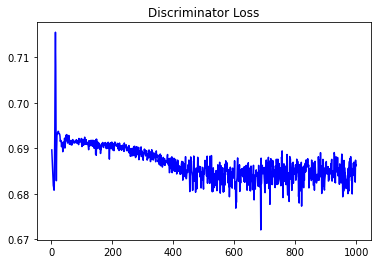

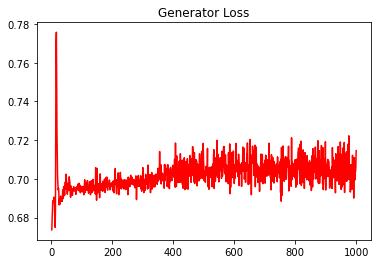

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.4259256359599531


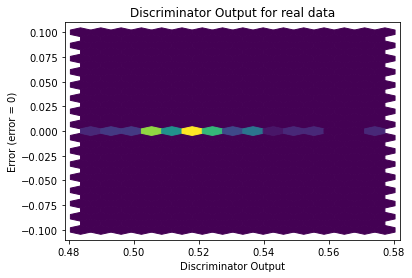

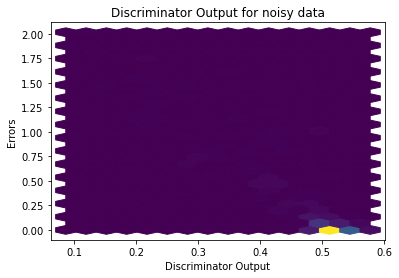

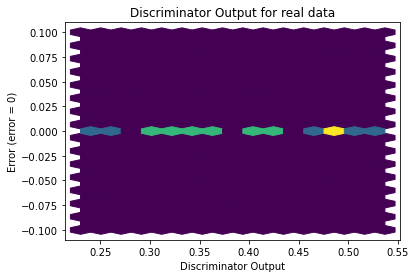

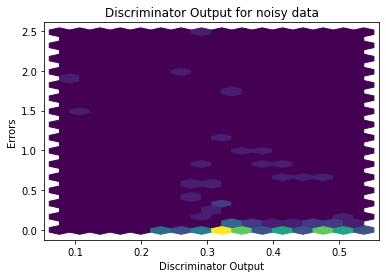

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

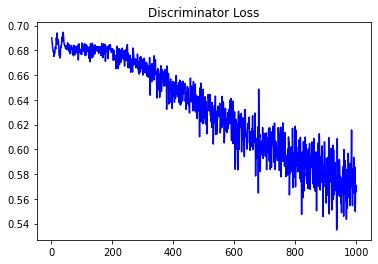

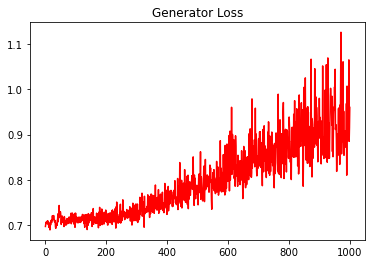

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5123328815940767


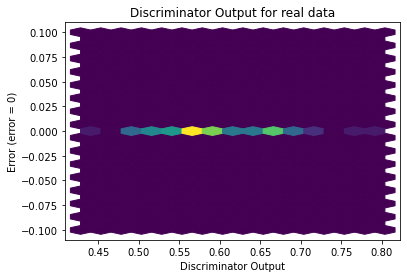

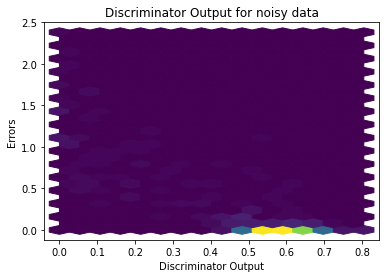

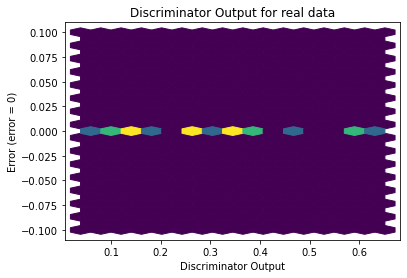

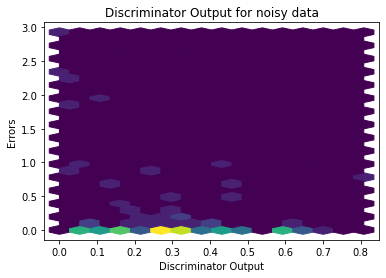

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


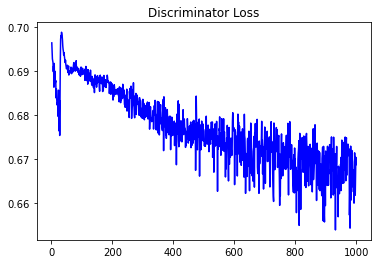

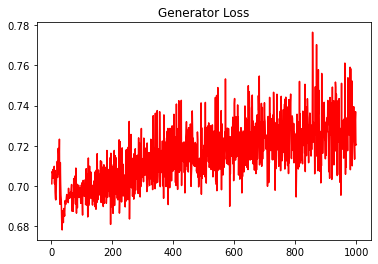

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4969883662126958


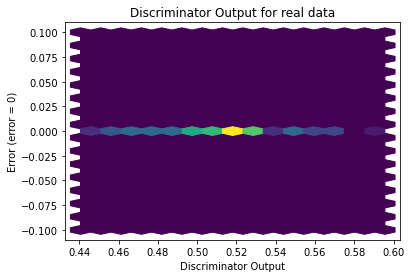

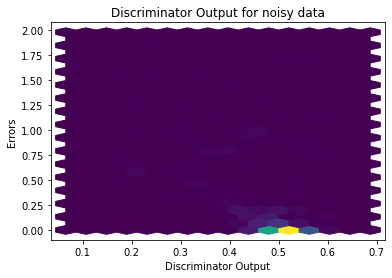

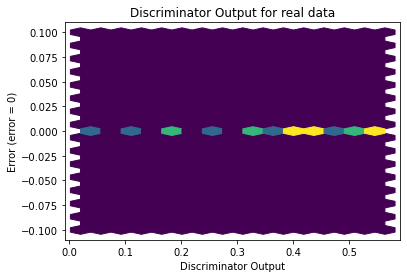

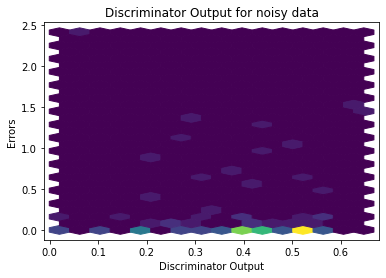

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


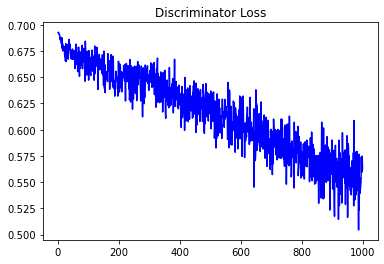

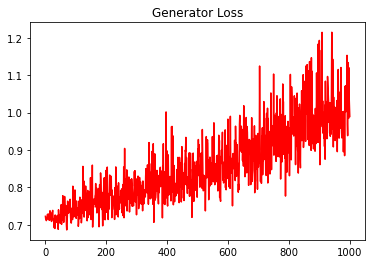

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.4853827974293381


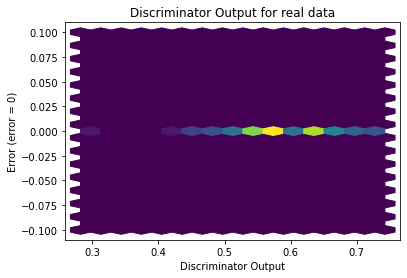

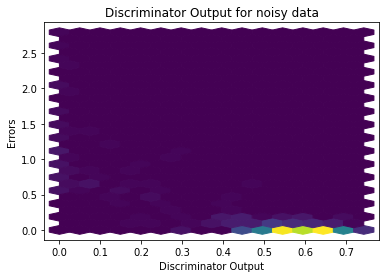

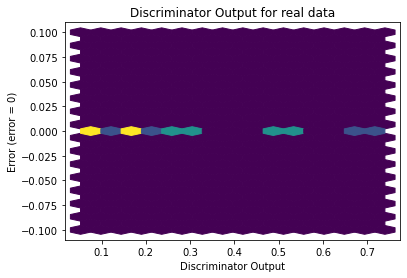

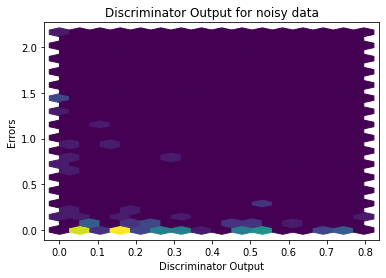

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1486]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7105]], requires_grad=True)
